In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import keras

In [3]:
train_dir = '/content/drive/MyDrive/figuier maladies/training'
validation_dir ='/content/drive/MyDrive/figuier maladies/validation'
test_dir = '/content/drive/MyDrive/figuier maladies/testing'

In [4]:
training_data = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        )
validation_data = ImageDataGenerator(rescale=1./255)

train_generator = training_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
    )
val_generator = validation_data.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
    )

Found 588 images belonging to 5 classes.
Found 62 images belonging to 5 classes.


Found 588 files belonging to 5 classes.
Found 118 files belonging to 5 classes.


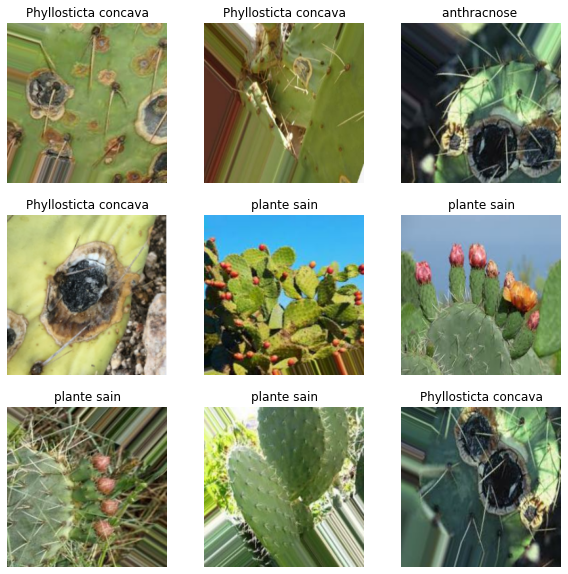

In [5]:
BATCH_SIZE = 32
IMG_SIZE = (244, 244)

# seulement pour l'affichage dans les plots
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
# cette dataset aussi
validation_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(pool_size =(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size =(2, 2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(5, activation='softmax'))

In [15]:
model.layers

In [16]:
model

In [17]:
#plotting a graphical representation of the model
import keras 
import pydotplus
from keras.utils.vis_utils import model_to_dot

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 186624)           

In [19]:
from tensorflow.keras import optimizers
model.compile(
     loss='categorical_crossentropy',
     optimizer='Adam',
     metrics= ['accuracy'])

In [26]:
history = model.fit(
      train_generator,
      epochs = 20,
      validation_data = val_generator
)

Epoch 1/20
30/30 [==============================] - 65s 2s/step - loss: 1.2809 - accuracy: 0.5323 - val_loss: 1.3418 - val_accuracy: 0.3387
Epoch 2/20
30/30 [==============================] - 63s 2s/step - loss: 1.1584 - accuracy: 0.5459 - val_loss: 1.2803 - val_accuracy: 0.3548
Epoch 3/20
30/30 [==============================] - 63s 2s/step - loss: 1.1391 - accuracy: 0.5663 - val_loss: 1.1360 - val_accuracy: 0.4355
Epoch 4/20
30/30 [==============================] - 63s 2s/step - loss: 1.1353 - accuracy: 0.5561 - val_loss: 1.3529 - val_accuracy: 0.2903
Epoch 5/20
30/30 [==============================] - 65s 2s/step - loss: 1.0804 - accuracy: 0.5833 - val_loss: 1.1725 - val_accuracy: 0.4516
Epoch 6/20
30/30 [==============================] - 63s 2s/step - loss: 1.2287 - accuracy: 0.5510 - val_loss: 1.2854 - val_accuracy: 0.3548
Epoch 7/20
30/30 [==============================] - 65s 2s/step - loss: 1.1116 - accuracy: 0.5612 - val_loss: 1.2653 - val_accuracy: 0.4355
Epoch 8/20
30/30 [==

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
    )

Found 118 images belonging to 5 classes.


In [28]:
model.evaluate(test_generator, steps=9)

9/9 [==============================] - 3s 313ms/step - loss: 0.8447 - accuracy: 0.6441


[0.8447257280349731, 0.6440678238868713]

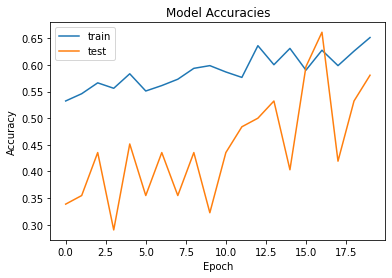

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

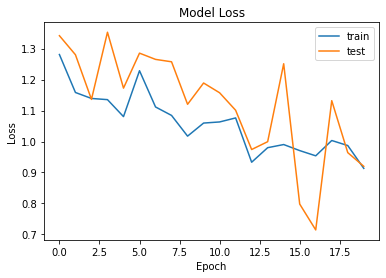

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [31]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches)
validation_dataset = validation_dataset.skip(val_batches )